# Simple Exponential Smoothing

In [31]:
import pandas as pd

Define a dataframe with the forecasts that can be used to demonstrate exponential smoothing

In [32]:
col_names =  ['Day', 'Value']
data  = pd.DataFrame(columns = col_names)

data['Day'] = [1,2,3,4,5]
data['Value'] = [39,44,40,45,38]
data

,Day,Value
0,1,39
1,2,44
2,3,40
3,4,45
4,5,38


**Formula for exponential Smoothing **

Ft+1 = α St + ( 1 - α ) Ft

- Let t be the time(here Day) 
- Let Ft be the forecast at time t
- Let St be the Sales at time t 

Let us take the α value to be 0.2

We take the forecast for the first day sales value as NA and apply the formula from the second day


In [33]:
def exp_smooth(alpha):
    ft = 0
    forecast = []
    for i in range(0,len(data)):
        if(ft == 0):
            ft = data['Value'][i]
            forecast.append(ft)
        else:
            ft = alpha*(data['Value'][i]) + (1-alpha)*(ft)
            forecast.append(ft)
    return forecast

In [37]:
data['alpha=0.2'] = exp_smooth(0.2)
data['alpha=0.4'] = exp_smooth(0.4)
data['alpha=0.6'] = exp_smooth(0.6)
data['alpha=0.8'] = exp_smooth(0.8)

In [38]:
data

,Day,Value,alpha=0.2,alpha=0.4,alpha=0.6,alpha=0.8
0,1,39,39.0,39.000,39.000,39.000
1,2,44,40.0,41.000,42.000,43.000
2,3,40,40.0,40.600,40.800,40.600
3,4,45,41.0,42.360,43.320,44.120
4,5,38,40.4,40.616,40.128,39.224


• α = 1 leads to fast smoothing (nervous, volatile, naïve)

• α = 0 leads to slow smoothing (calm, staid, cumulative) 

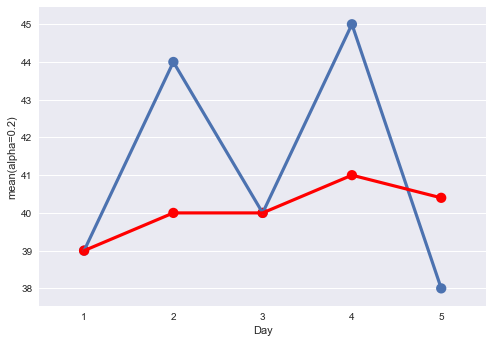

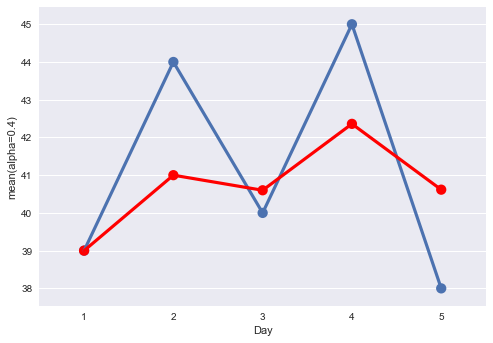

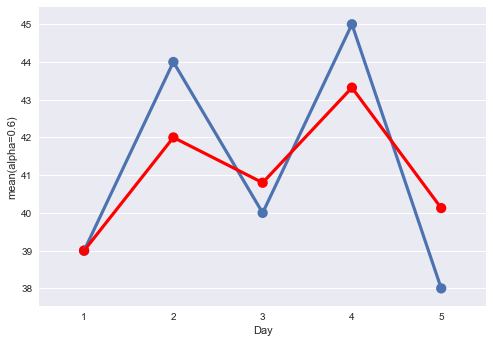

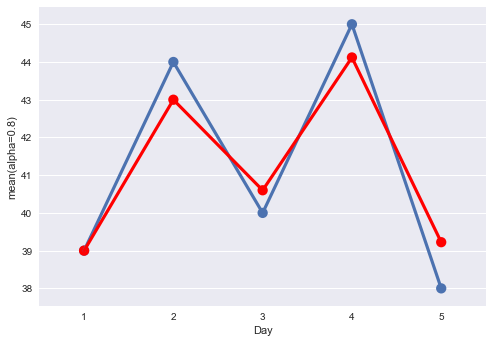

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.pointplot(x='Day', y='Value', data=data, ax=ax)
sns.pointplot(x='Day', y='alpha=0.2', data=data, ax=ax, color='r')
sns.plt.show()

fig, ax = plt.subplots()
sns.pointplot(x='Day', y='Value', data=data, ax=ax)
sns.pointplot(x='Day', y='alpha=0.4', data=data, ax=ax, color='r')
sns.plt.show()

fig, ax = plt.subplots()
sns.pointplot(x='Day', y='Value', data=data, ax=ax)
sns.pointplot(x='Day', y='alpha=0.6', data=data, ax=ax, color='r')
sns.plt.show()

fig, ax = plt.subplots()
sns.pointplot(x='Day', y='Value', data=data, ax=ax)
sns.pointplot(x='Day', y='alpha=0.8', data=data, ax=ax, color='r')
sns.plt.show()

But all these forecasts are not accurate, there is obviously some error 

### Let us calculate that error

In [85]:
def error(col):
    error = []
    error_sq = []
    for i in range(0,len(data)):
        e = data['Value'][i] - data[col][i]
        error.append(e)
        error_sq.append(e*e)
    data['Error'] = error
    data['Error_Square'] = error_sq

In [91]:
error('alpha=0.2')
data

,Day,Value,alpha=0.2,alpha=0.4,alpha=0.6,alpha=0.8,Error,Error_Square
0,1,39,39.0,39.000,39.000,39.000,0.0,0.00
1,2,44,40.0,41.000,42.000,43.000,4.0,16.00
2,3,40,40.0,40.600,40.800,40.600,0.0,0.00
3,4,45,41.0,42.360,43.320,44.120,4.0,16.00
4,5,38,40.4,40.616,40.128,39.224,-2.4,5.76


### Mean square error

In [92]:
sum(data['Error_Square'][1:])/len(data)

7.552000000000005

In [93]:
error('alpha=0.8')
data

,Day,Value,alpha=0.2,alpha=0.4,alpha=0.6,alpha=0.8,Error,Error_Square
0,1,39,39.0,39.000,39.000,39.000,0.000,0.000000
1,2,44,40.0,41.000,42.000,43.000,1.000,1.000000
2,3,40,40.0,40.600,40.800,40.600,-0.600,0.360000
3,4,45,41.0,42.360,43.320,44.120,0.880,0.774400
4,5,38,40.4,40.616,40.128,39.224,-1.224,1.498176


In [96]:
sum(data['Error_Square'][1:])/len(data)

0.7265152000000014

## We choose the parameter with minimal error on unseen data